In [1]:
# Импортируем инструментарий
import torch
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

## Train dataset

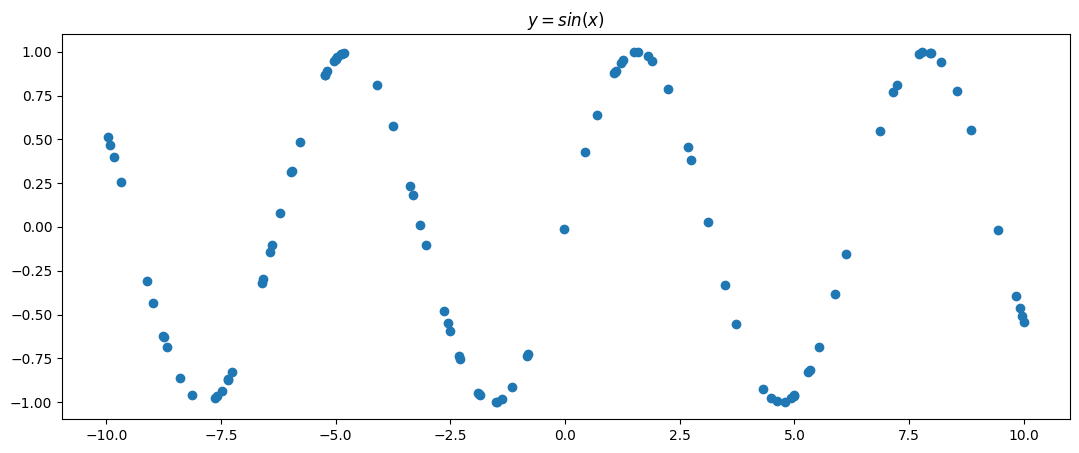

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Шумов этому распределению!

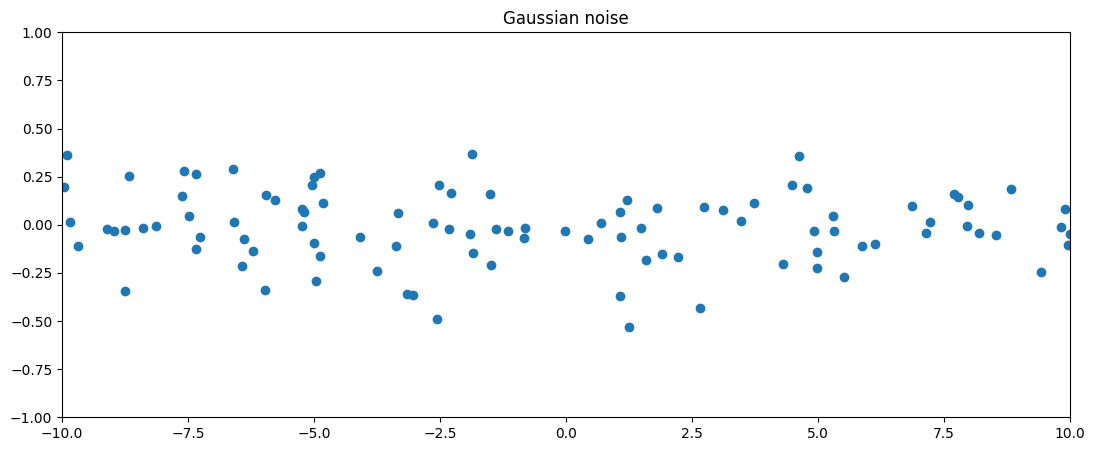

In [3]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

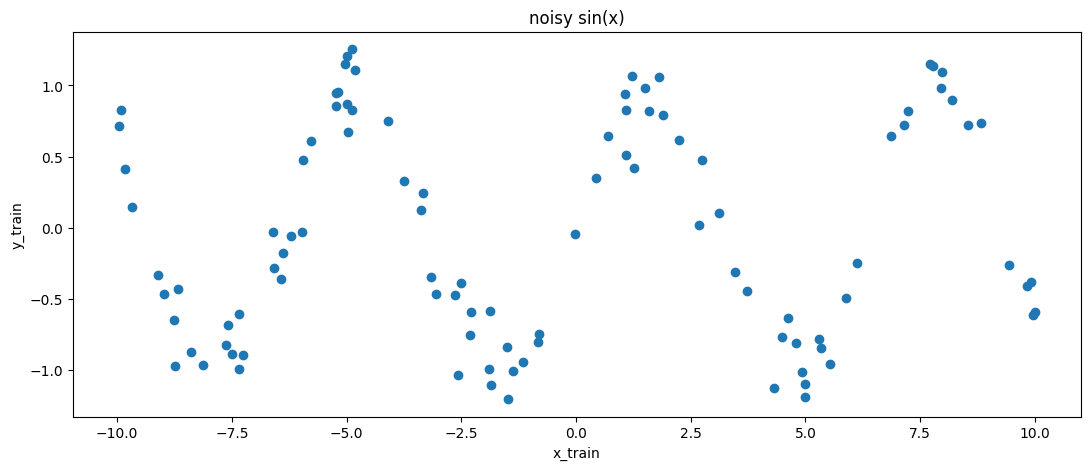

In [4]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

## Validation dataset

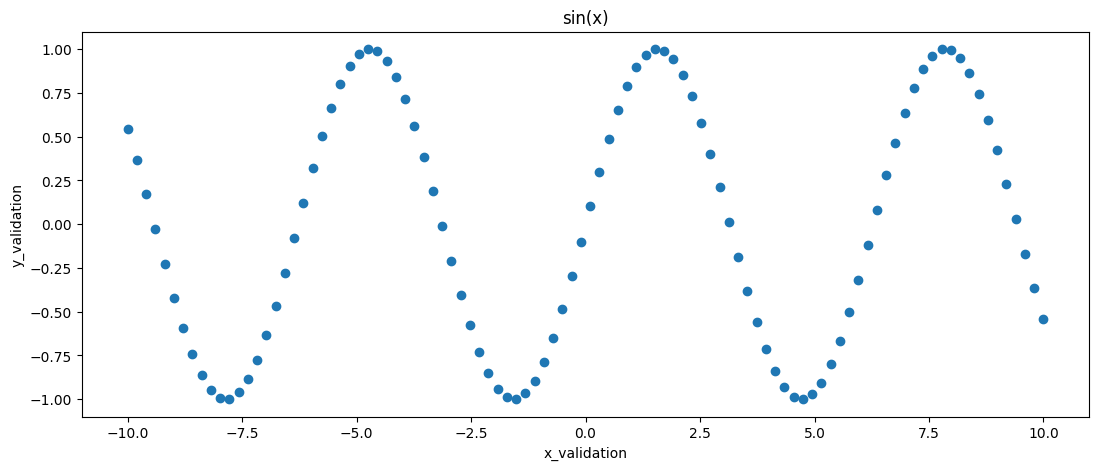

In [7]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [8]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

## Model construction

In [9]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

## Prediction

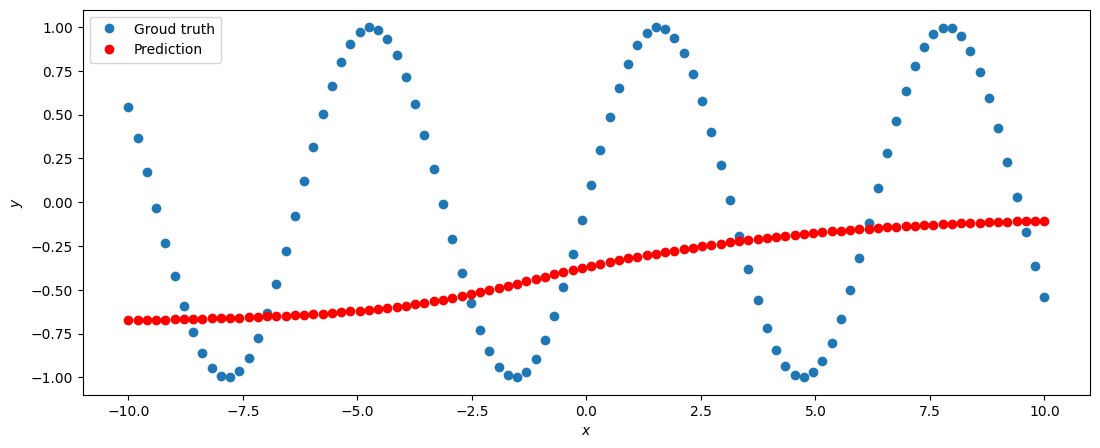

In [10]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

## Optimizer

In [12]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

## Loss function

In [13]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

## Training procedure

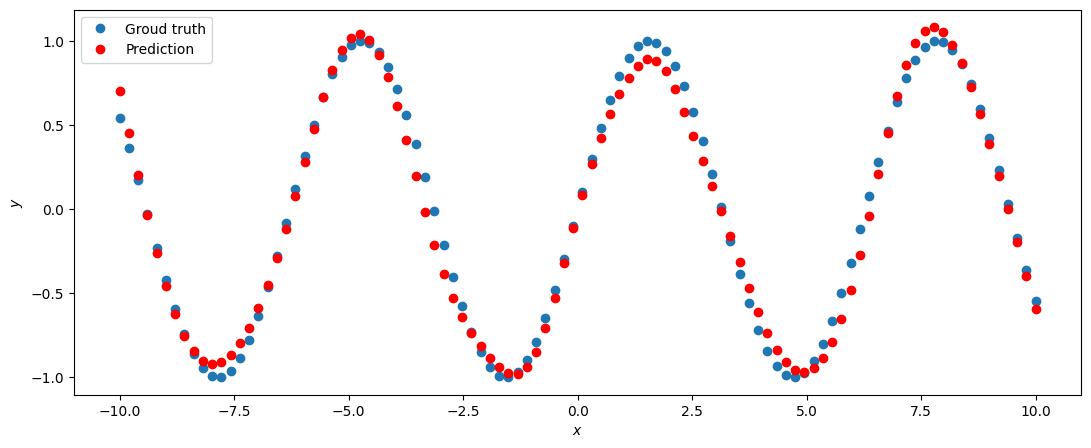

In [14]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

---

## New task

Обучим нейронную сеть для задачи регрессии.

Возьмем более сложную функцию в качестве таргета: $y = 2^xsin(2^{-x})$.

Кроме того, мы хотим получить хорошую метрику MAE на валидации: $MAE = \frac{1}{l}\sum_{i=1}^{l}|pred_i - target_i|$

In [69]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

reg_net = RegressionNet(100)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(reg_net.parameters(), lr=0.01)

def mean_absolute_error(predictions, targets):
    absolute_errors = torch.abs(predictions - targets)
    mae = torch.mean(absolute_errors)
    return mae

for epoch_index in range(3000):
    optimizer.zero_grad()

    y_pred = reg_net.forward(x_train)
    loss_value = mean_absolute_error(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(reg_net.forward(x_validation), y_validation).item())

0.021162746474146843


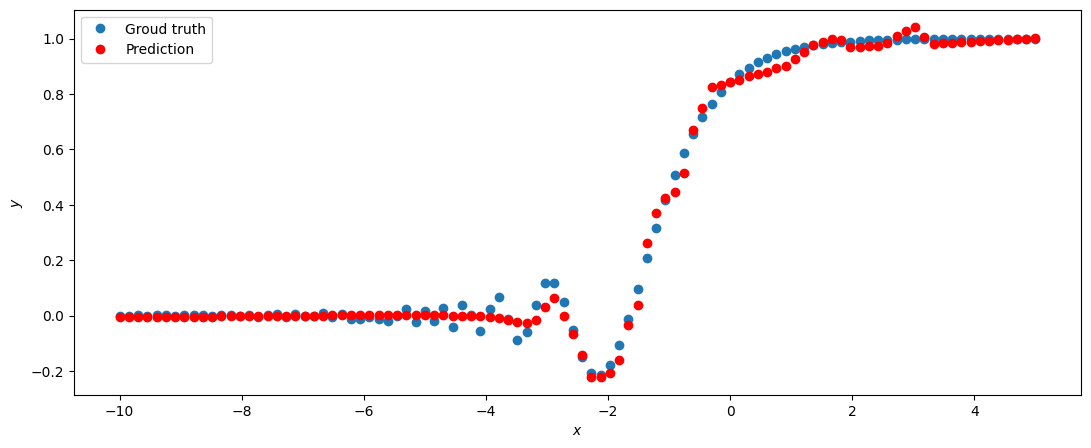

In [70]:
predict(reg_net, x_validation, y_validation)